In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_parquet('Datasets/train_modified.parquet', engine='pyarrow')

In [ ]:
X = df.drop(columns=['isLow', 'price'])#seleccinamos las variables features
y = df.isLow#seleccionamos la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y)#dividimos la data (por defecto 75:25)

Calculamos la precicion con el test

In [3]:
depthAcc = {}
depthRec = {}
for k in range(1, 100):
    clf = DecisionTreeClassifier(max_depth=k)
    clf = clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    
    depthAcc[k] = accuracy_score(y_test, y_pred)
    depthRec[k] = recall_score(y_test, y_pred)

In [ ]:
depth_tests = pd.DataFrame()
depth_tests['depth'] = depthAcc.keys()
depth_tests['accuracy_train'] = depthAcc.values()
depth_tests['recallScore_train'] = depthRec.values()

In [ ]:
depth_tests.to_csv('tests_results/depth_tests.csv', sep=';', mode='a', index=False, header=True)

Calculamos la precicion con el propio train

In [3]:
depthAcc = {}
depthRec = {}
for k in range(1, 100):
    clf = DecisionTreeClassifier(max_depth=k)
    clf = clf.fit(X_train,y_train)

    y_pred = clf.predict(X_train)
    
    depthAcc[k] = accuracy_score(y_train, y_pred)
    depthRec[k] = recall_score(y_train, y_pred)

In [4]:
depth_tests = pd.DataFrame()
depth_tests['depth'] = depthAcc.keys()
depth_tests['accuracy_train'] = depthAcc.values()
depth_tests['recallScore_train'] = depthRec.values()

In [5]:
depth_tests.to_csv('tests_results/depth_train.csv', sep=';', mode='a', index=False, header=True)

Graficas

In [3]:
df_depthTest = pd.read_csv('tests_results/depth_tests.csv', sep=';')
df_depthTrain = pd.read_csv('tests_results/depth_train.csv', sep=';')

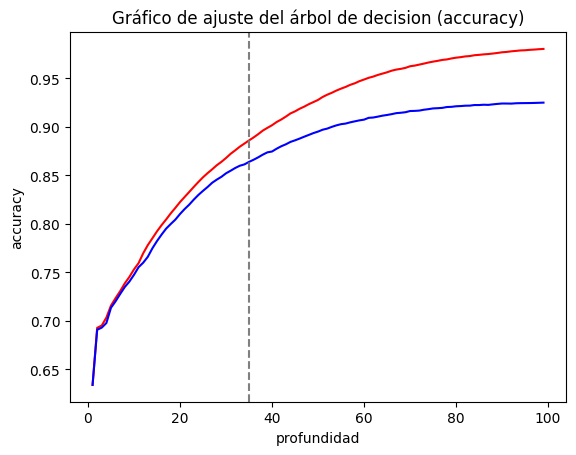

In [22]:
plt.figure()
plt.plot(df_depthTrain['depth'], df_depthTrain['accuracy'], color='r', label='Set de entrenamiento')
plt.plot(df_depthTest['depth'], df_depthTest['accuracy'], color='b', label='Set de testeo')
plt.axvline(x=35, color = 'grey', linestyle="--")
plt.title('Gráfico de ajuste del árbol de decision (accuracy)', fontsize = 12)
plt.xlabel("profundidad")
plt.ylabel("accuracy")
plt.show()

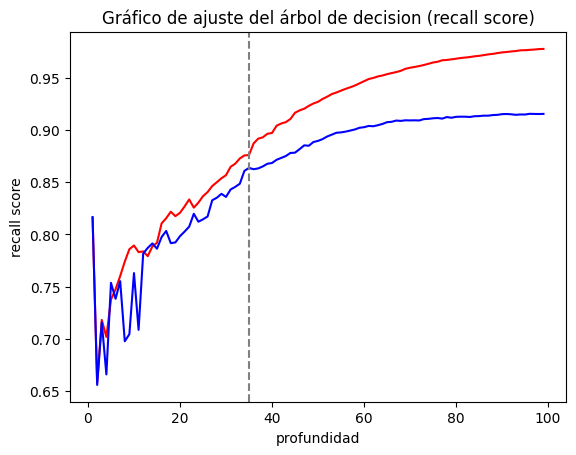

In [21]:
plt.figure()
plt.plot(df_depthTrain['depth'], df_depthTrain['recallScore'], color='r', label='Set de entrenamiento')
plt.plot(df_depthTest['depth'], df_depthTest['recallScore'], color='b', label='Set de testeo')
plt.axvline(x=35, color = 'grey', linestyle="--")
plt.title('Gráfico de ajuste del árbol de decision (recall score)', fontsize = 12)
plt.xlabel("profundidad")
plt.ylabel("recall score")
plt.show()

Test con la profundidad elegida

In [3]:
X = df.drop(columns=['isLow', 'price'])#seleccinamos las variables features
y = df.isLow#seleccionamos la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y)#dividimos la data (por defecto 75:25)

In [4]:
clf = DecisionTreeClassifier(max_depth=35)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [5]:
acc = accuracy_score(y_test, y_pred)
print('acc = '+str(acc))
rec = recall_score(y_test, y_pred)
print('rec = '+str(rec))


acc = 0.8598684058105321
rec = 0.8602296084624255
